In [1]:
import pandas as pd
import sys
from pyautomlib.preprocess import DataProcessor
from pyautomlib.config import PreprocessModel,RegressionModel
from pyautomlib.regression import Regression

In [3]:
df = pd.read_csv("datasets/pgv.csv")
df.head()

,MW,FaultType,Rjb,VS30,PGV
0,3.4,Ters Oblik Atımlı,11.99,423.11,0.115703
1,3.4,Ters Oblik Atımlı,85.59,347.00,0.006923
2,3.4,Ters Oblik Atımlı,213.84,361.00,0.003440
3,3.4,Ters Oblik Atımlı,72.56,461.00,0.009180
4,3.4,Ters Oblik Atımlı,85.21,505.00,0.016207


In [4]:
df.replace("Ters Oblik Atımlı", "Ters", inplace=True)
df.replace("Ters Eğim Atımlı", "Ters", inplace=True)
df.replace("Yanal Atımlı", "Yanal", inplace=True)
df.replace("Normal Oblik Atımlı", "Normal", inplace=True)
df.replace("Normal Eğim Atımlı", "Normal", inplace=True)

In [5]:
pm = PreprocessModel()
dp = DataProcessor(df,pm,"PGV")
df_processed = dp.process_data()
df_processed.head()

,MW,Rjb,VS30,PGV,FaultType_Ters,FaultType_Yanal
3,-1.094138,-0.169395,0.101977,-1.132477,1,0
8,-1.094138,0.678131,5.134728,-1.512182,1,0
17,-1.094138,1.438425,1.633841,-1.468047,1,0
23,-1.094138,0.101400,-0.195928,-1.021364,1,0
27,-1.094138,-0.731141,-0.277831,-0.585329,1,0


In [7]:
x_train, x_test, y_train, y_test = dp.split_data()

In [8]:
regressor = Regression(x_train,y_train,config.RegressionModel())
model = regressor.create_model()

Base Models....
Best 3 models: ['LightGBM', 'XGBoost', 'RF']
Hyperparameter Optimization....
LightGBM best score : 0.9613

XGBoost best score : 0.9623

RF best score : 0.9598

R2: 0.9631195242534254


In [9]:
from sklearn.metrics import r2_score

y_predict = model.predict(x_test)
test_score = r2_score(y_test, y_predict)
print("test_score = ", test_score)

test_score =  0.9627950544452202


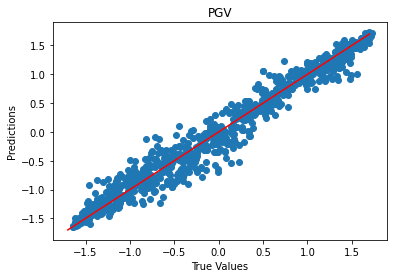

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict)
plt.plot([-1.7, 1.7], [-1.7, 1.7], color='red')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("PGV")
plt.show()
plt.close()

In [12]:
regressor.save_model("pgv_model")